In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()


food_source_color = '#7DC160'
# total_energy_color = '#f4cccc'
fish_energy_color = '#4e73b0'
# 7DC160

In [11]:
results_df: pd.DataFrame = pd.read_csv('5g_fed_weight-foodsources.csv')
results_df.head()

,Step,TimeStamp,AvgEnergy,AverageEnergy_5th,AverageEnergy_95th,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.001001,384.0000,384.0000,384.0000,1,1,450.0000,-5.960464e-08,0
1,1,3.480029,384.0099,384.0099,384.0099,1,1,450.0035,0.000000e+00,0
2,2,6.943575,384.0190,384.0190,384.0190,1,1,450.0095,2.980232e-08,0
3,3,10.475580,384.0274,384.0274,384.0274,1,1,450.0179,-1.788139e-07,0
4,4,14.003600,384.0352,384.0352,384.0352,1,1,450.0281,2.980232e-08,0


In [12]:
fb4_df = pd.read_csv('fb4/fb4_5g_fed_weight.csv')

fb4_df['Hours'] = fb4_df['Day'] * 24

new_row = {'Day': 0, 'Weight.g': 384, 'Hours': 0}
fb4_df = fb4_df.append(new_row, ignore_index=True)

fb4_df

C:\Users\Niels\AppData\Local\Temp\ipykernel_43844\633239597.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fb4_df = fb4_df.append(new_row, ignore_index=True)


,Unnamed: 0,Day,Temperature.C,Weight.g,Hours
0,1.0,1,5.0,384.280658,24
1,2.0,2,5.0,384.560612,48
2,3.0,3,5.0,384.839865,72
3,4.0,4,5.0,385.118416,96
4,5.0,5,5.0,385.396270,120
5,6.0,6,5.0,385.673428,144
6,7.0,7,5.0,385.949891,168
7,8.0,8,5.0,386.225661,192
8,9.0,9,5.0,386.500741,216
9,10.0,10,5.0,386.775132,240


In [13]:
# Configuration:

truncated_df_1 = results_df.iloc[1:721]

print(truncated_df_1.describe())


             Step    TimeStamp   AvgEnergy  AverageEnergy_5th  \
count  720.000000   720.000000  720.000000         720.000000   
mean   360.500000  1303.561277  387.223397         387.223397   
std    207.990384   741.294191    1.844118           1.844118   
min      1.000000     3.480029  384.009900         384.009900   
25%    180.750000   670.526800  385.630475         385.630475   
50%    360.500000  1306.140000  387.244100         387.244100   
75%    540.250000  1944.983000  388.817625         388.817625   
max    720.000000  2572.345000  390.368600         390.368600   

       AverageEnergy_95th  NoBoids  NoFoodSources  TotalFoodAvailable  \
count          720.000000    720.0          720.0          720.000000   
mean           387.223397      1.0            1.0          452.116669   
std              1.844118      0.0            0.0            1.198314   
min            384.009900      1.0            1.0          450.003500   
25%            385.630475      1.0            1.0

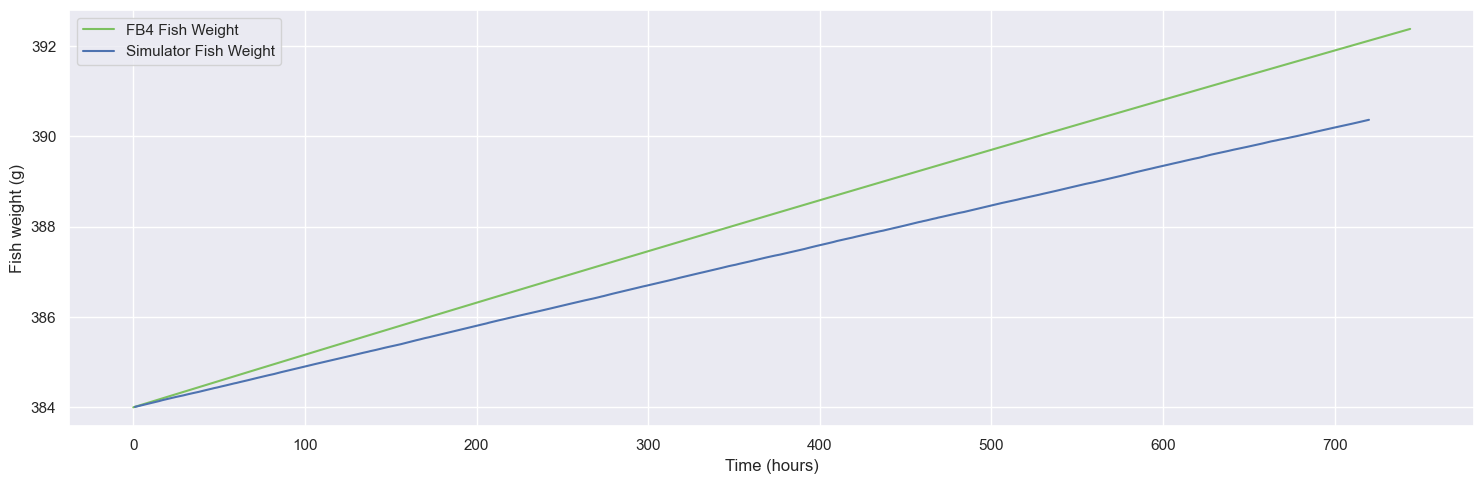

In [14]:
fig = plt.figure(figsize=(15, 5))

sns.lineplot(data=fb4_df, x='Hours', y='Weight.g', label='FB4 Fish Weight', color=food_source_color)
sns.lineplot(data=truncated_df_1, x='Step', y='AvgEnergy', label='Simulator Fish Weight', color=fish_energy_color)
plt.xlabel('Time (hours)')
plt.ylabel('Fish weight (g)')
plt.tight_layout()
plt.legend()
 
plt.savefig('plots/exp4-bioenergetics-5g-foodsources.pdf')

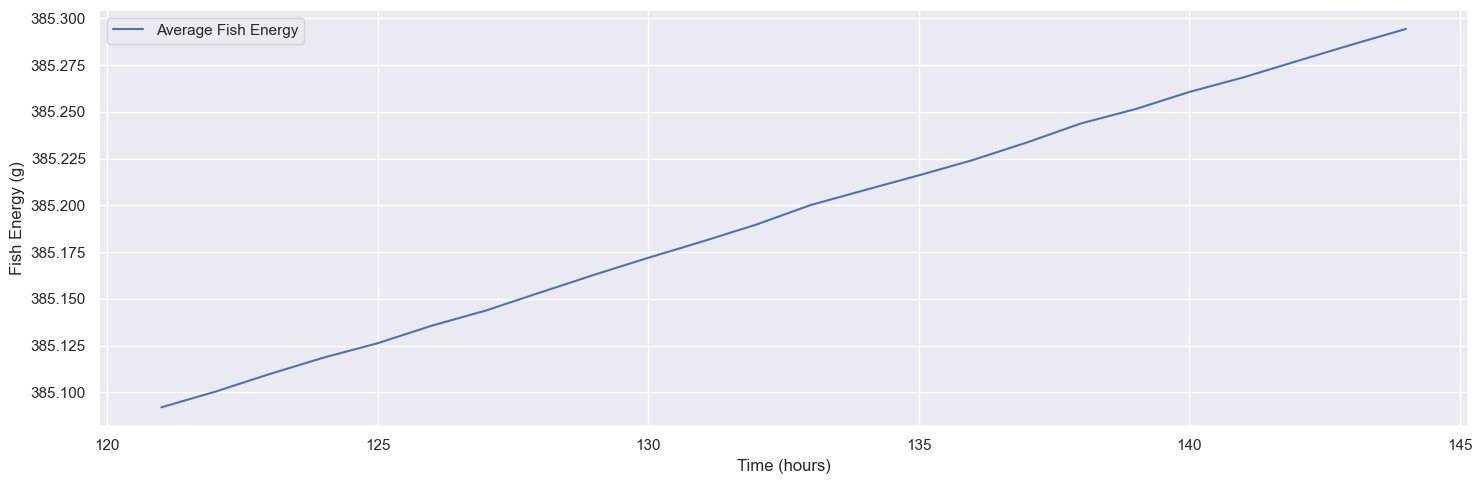

In [15]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot()
# sns.scatterplot(data=fb4_df[4:6], x='Hours', y='Weight.g', label='FB4 Fish Weight', ax=ax, color=food_source_color)
sns.lineplot(data=truncated_df_1[120:144], x='Step', y='AvgEnergy', ax=ax, label='Average Fish Energy', color=fish_energy_color)
plt.xlabel('Time (hours)')
plt.ylabel('Fish Energy (g)')
plt.tight_layout()
 
plt.savefig('plots/exp4-bioenergetics-zoomed.pdf')